<a href="https://colab.research.google.com/github/LTJ508/Quantum_Computing/blob/main/Qiskit%20Practice/From%20Pre-Recorded%20Lecture/Qiskit_Practice_Lecture_12.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">Qiskit Practice - Lecture 12</font>

## Install Library

In [1]:
!pip uninstall qiskit qiskit-aer
!pip install qiskit==0.46.0
!pip install pylatexenc
!pip install qiskit-aer==0.13.0
#!pip install qiskit-ibm-runtime
#!pip install qiskit-ibm-provider
!pip install qiskit-ignis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=0c443811102f6cedf63f4b418fc30c987d34eeb2c864bf4194ee57eefbab28ba
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Import Library

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from qiskit import *
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere, plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit_aer import AerSimulator

#from qiskit_ibm_runtime import QiskitRuntimeService
#from qiskit_ibm_provider.job import job_monitor
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit import transpile
import time

import numpy as np
from qiskit.quantum_info import random_statevector
from qiskit.circuit.library import Initialize
from qiskit.result import marginal_counts

from qiskit_aer.noise import NoiseModel, pauli_error, depolarizing_error
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter

from IPython.core.interactiveshell import error
from qiskit.tools import job_monitor
from qiskit.pulse import cx

## Quantum Error Correction using Repetition Code

## Noise Model Function

In [4]:
def get_noise(p_gate, p_measure):
  measure_error = pauli_error([('X', p_measure), ('I', 1 - p_measure)])
  error_gate1 = depolarizing_error(p_gate, 1) # 1 qubit error
  error_gate2 = error_gate1.tensor(error_gate1) # 2 qubit error

  noise_model = NoiseModel()

  # apply measurement error to noise model
  noise_model.add_all_qubit_quantum_error(measure_error, "measure")

  # apply 1 qubit gate error
  noise_model.add_all_qubit_quantum_error(error_gate1, ["X"])

  # apply 2 qubit gate error
  noise_model.add_all_qubit_quantum_error(error_gate2, ["CX"])

  return noise_model

### Create Noise Model

In [5]:
noise_model = get_noise(0.01, 0.01)

## Encoding with physical qubits and effect of noise model

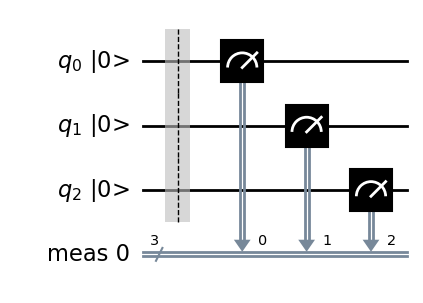

In [8]:
# crate 3 qubit
circuit = QuantumCircuit(3)
circuit.measure_all()

circuit.draw(initial_state=True, output='mpl')

### Run on Simulator

Job Status: job has successfully run


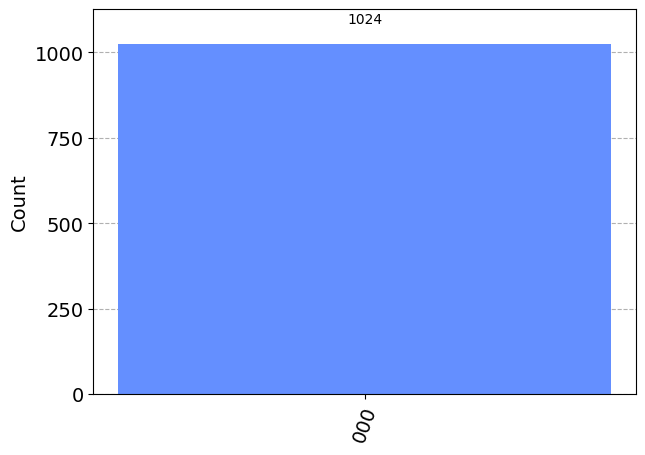

In [7]:
simulator = AerSimulator()

circuit.save_statevector()
qobj = assemble(circuit)

job = simulator.run(qobj)
job_monitor(job)

result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### Run on Simulator with Noise

Job Status: job has successfully run


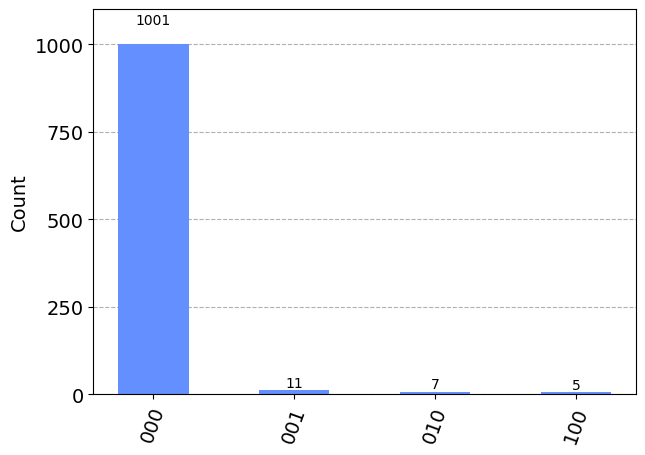

In [9]:
simulator = AerSimulator()

circuit.save_statevector()
qobj = assemble(circuit)

job = simulator.run(qobj, noise_model=noise_model)
job_monitor(job)

result = job.result()
counts = result.get_counts()
plot_histogram(counts)

## Encode Logical 1 Using 3 qubits

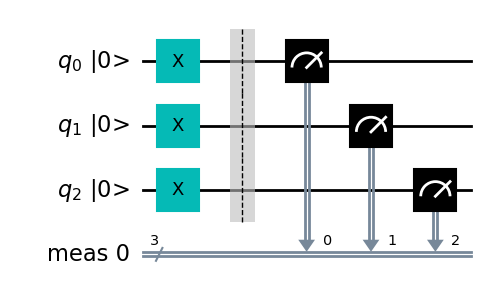

In [13]:
# create 3 qubit
circuit = QuantumCircuit(3)

# apply x gate
circuit.x([0, 1, 2])

circuit.measure_all()

circuit.draw(initial_state=True, output='mpl')

### Run on Simulator with Noise

Job Status: job has successfully run


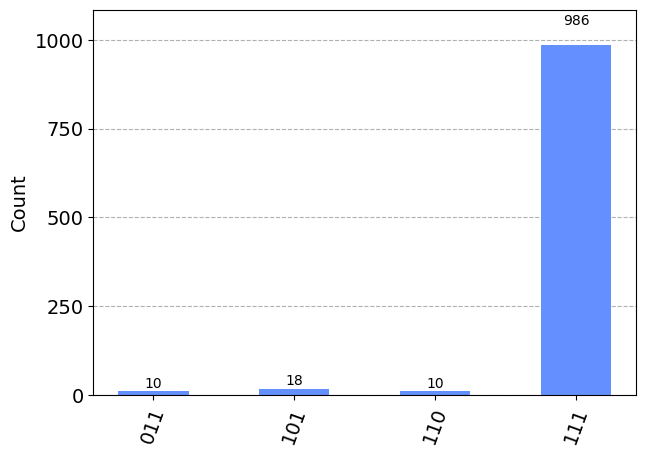

In [11]:
simulator = AerSimulator()

circuit.save_statevector()
qobj = assemble(circuit)

job = simulator.run(qobj, noise_model=noise_model)
job_monitor(job)

result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### Increase error in noise model

In [12]:
# 50% probability
noise_model = get_noise(0.5, 0.5)

### Run on Simulator with Noise

Job Status: job has successfully run


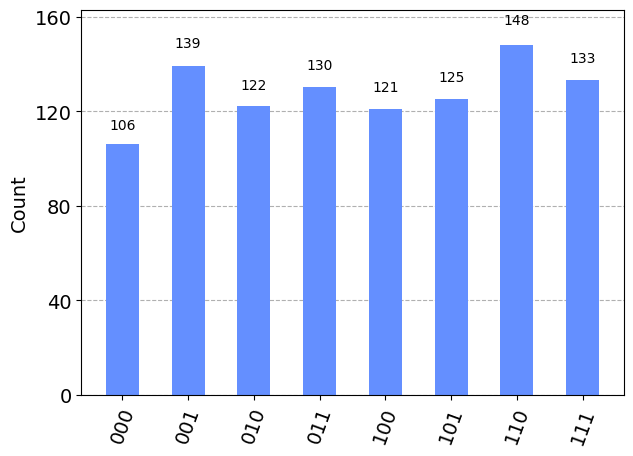

In [14]:
simulator = AerSimulator()

circuit.save_statevector()
qobj = assemble(circuit)

job = simulator.run(qobj, noise_model=noise_model)
job_monitor(job)

result = job.result()
counts = result.get_counts()
plot_histogram(counts)

## Syndrome Measurement

### Build Circuit

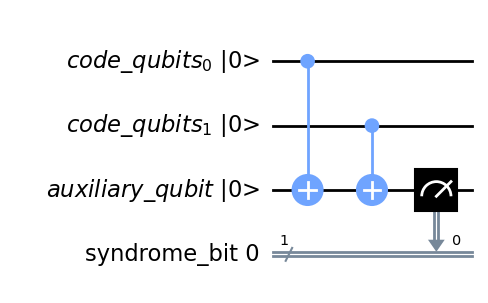

In [15]:
#define 2 q register
qr1 = QuantumRegister(2, name='code_qubits')
qr2 = QuantumRegister(1, name='auxiliary_qubit')

# 1 classical Register
cr1 = ClassicalRegister(1, name='syndrome_bit')

# Create circuit
qc = QuantumCircuit(qr1, qr2, cr1)

#apply cx gate to both code_qubits
qc.cx(qr1[0], qr2[0])
qc.cx(qr1[1], qr2[0])

#measure auxiliary qubit
qc.measure(qr2[0], cr1[0])

#draw circuit
qc.draw(initial_state=True, output='mpl')

### Run on Simulator

In [16]:
simulator = AerSimulator()

qobj = assemble(qc)

job = simulator.run(qobj)
job_monitor(job)

result = job.result()
counts = result.get_counts()
print(counts)

Job Status: job has successfully run
{'0': 1024}


## Encode logical 1 with 2 physical qubits

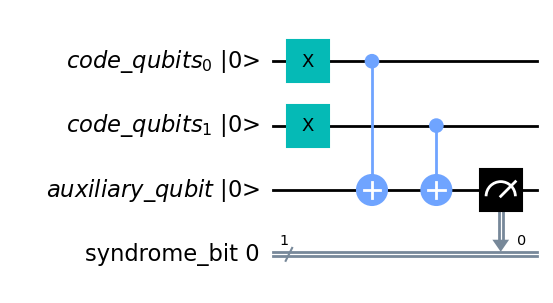

In [17]:
#define 2 q register
qr1 = QuantumRegister(2, name='code_qubits')
qr2 = QuantumRegister(1, name='auxiliary_qubit')

# 1 classical Register
cr1 = ClassicalRegister(1, name='syndrome_bit')

# Create circuit
qc = QuantumCircuit(qr1, qr2, cr1)

#apply x gate
qc.x([ qr1[0], qr1[1] ])

#apply cx gate to both code_qubits
qc.cx(qr1[0], qr2[0])
qc.cx(qr1[1], qr2[0])

#measure auxiliary qubit
qc.measure(qr2[0], cr1[0])

#draw circuit
qc.draw(initial_state=True, output='mpl')

### Run on Simulator

In [18]:
simulator = AerSimulator()

qobj = assemble(qc)

job = simulator.run(qobj)
job_monitor(job)

result = job.result()
counts = result.get_counts()
print(counts)

Job Status: job has successfully run
{'0': 1024}


## prepare code qubits in superposition

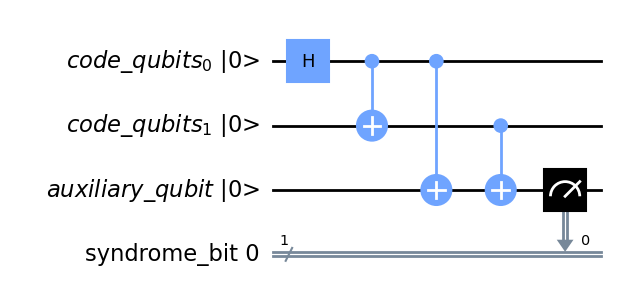

In [19]:
#define 2 q register
qr1 = QuantumRegister(2, name='code_qubits')
qr2 = QuantumRegister(1, name='auxiliary_qubit')

# 1 classical Register
cr1 = ClassicalRegister(1, name='syndrome_bit')

# Create circuit
qc = QuantumCircuit(qr1, qr2, cr1)

#prepare in superposition
qc.h(qr1[0])
qc.cx(qr1[0], qr1[1])

#apply cx gate to both code_qubits
qc.cx(qr1[0], qr2[0])
qc.cx(qr1[1], qr2[0])

#measure auxiliary qubit
qc.measure(qr2[0], cr1[0])

#draw circuit
qc.draw(initial_state=True, output='mpl')

### Run on Simulator

In [20]:
simulator = AerSimulator()

qobj = assemble(qc)

job = simulator.run(qobj)
job_monitor(job)

result = job.result()
counts = result.get_counts()
print(counts)

Job Status: job has successfully run
{'0': 1024}


## Prepare code qubit in different state

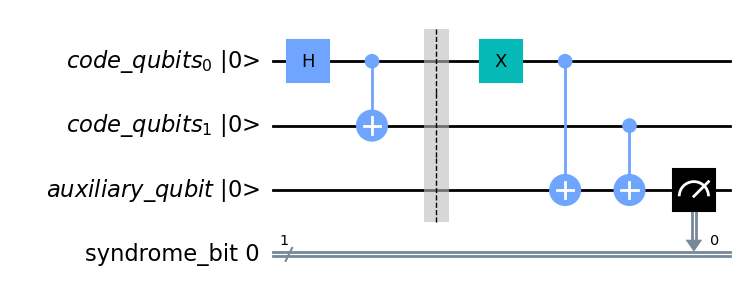

In [21]:
#define 2 q register
qr1 = QuantumRegister(2, name='code_qubits')
qr2 = QuantumRegister(1, name='auxiliary_qubit')

# 1 classical Register
cr1 = ClassicalRegister(1, name='syndrome_bit')

# Create circuit
qc = QuantumCircuit(qr1, qr2, cr1)

#prepare in superposition
qc.h(qr1[0])
qc.cx(qr1[0], qr1[1])

qc.barrier()

#apply x gate
qc.x(qr1[0])

#apply cx gate to both code_qubits
qc.cx(qr1[0], qr2[0])
qc.cx(qr1[1], qr2[0])

#measure auxiliary qubit
qc.measure(qr2[0], cr1[0])

#draw circuit
qc.draw(initial_state=True, output='mpl')

### Run on Simulator

In [22]:
simulator = AerSimulator()

qobj = assemble(qc)

job = simulator.run(qobj)
job_monitor(job)

result = job.result()
counts = result.get_counts()
print(counts)

Job Status: job has successfully run
{'1': 1024}


## Quantum Repetition Code

## Import Library

In [23]:
from qiskit.ignis.verification.topological_codes import RepetitionCode, lookuptable_decoding

### Create Repetition Code Circuit

In [24]:
#number of physical qubits
n = 3

#round of syndrom measurement
T = 1

code = RepetitionCode(n, T)

### Repetition Code return 2 circuit

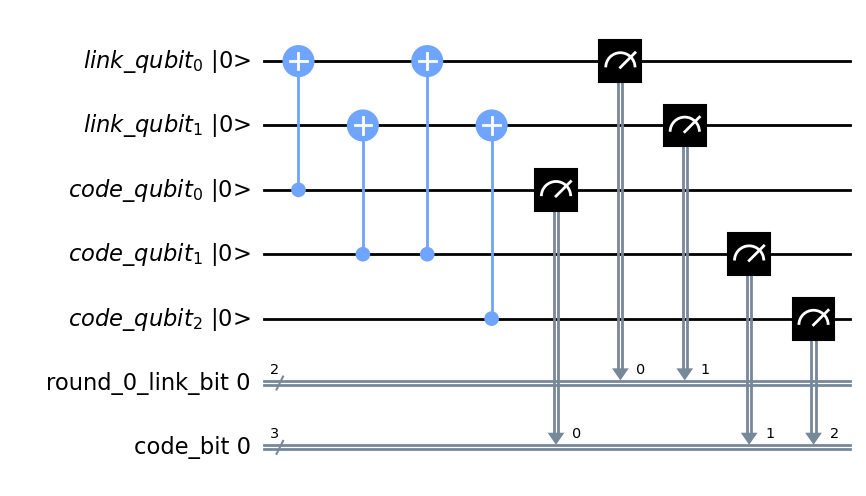

In [25]:
code.circuit['0'].draw(initial_state=True, output='mpl')

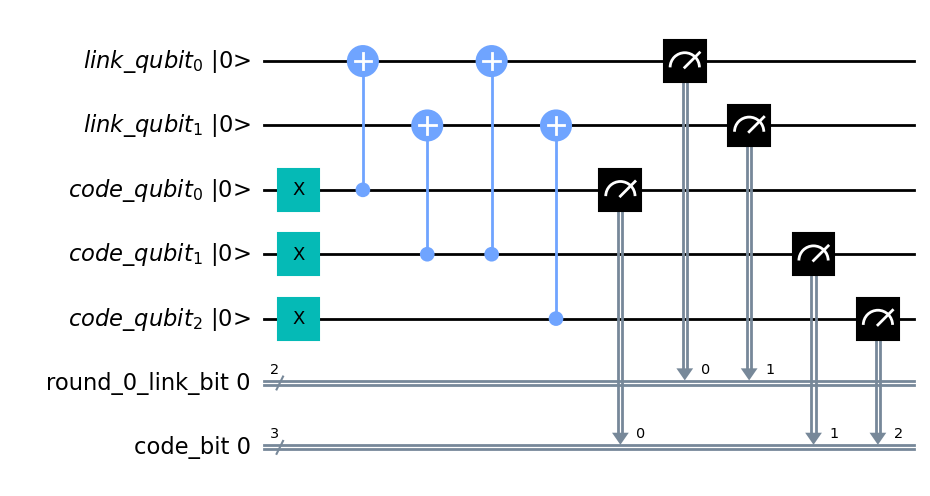

In [26]:
code.circuit['1'].draw(initial_state=True, output='mpl')

### Run on simulator without noise

In [27]:
def get_raw_results(code, noise_model=None):
  circuits = code.get_circuit_list()
  raw_results = {}

  for log in range(2):
    qobj = assemble(circuits[log])
    job = simulator.run(qobj, noise_model=noise_model)
    raw_results[log] = job.result().get_counts(str(log))

  return raw_results
raw_results = get_raw_results(code)

for log in raw_results:
  print('Logical', log, ':', raw_results[log], '\n')

Logical 0 : {'000 00': 1024} 

Logical 1 : {'111 00': 1024} 



### Multi Round Syndrome Measurement

In [28]:
#number of physical qubits
n = 3

#round of syndrom measurement
T = 4

code = RepetitionCode(n, T)

### Run on simulator without noise

In [29]:
def get_raw_results(code, noise_model=None):
  circuits = code.get_circuit_list()
  raw_results = {}

  for log in range(2):
    qobj = assemble(circuits[log])
    job = simulator.run(qobj, noise_model=noise_model)
    raw_results[log] = job.result().get_counts(str(log))

  return raw_results
raw_results = get_raw_results(code)

for log in raw_results:
  print('Logical', log, ':', raw_results[log], '\n')

Logical 0 : {'000 00 00 00 00': 1024} 

Logical 1 : {'111 00 00 00 00': 1024} 



### Repetition code with noise

In [36]:
#number of physical qubits
n = 3

#round of syndrom measurement
T = 1

code = RepetitionCode(n, T)

### Create noise model for repetition code

In [37]:
noise_model = get_noise(0.05, 0.05)

### Run on simulator with noise model

In [38]:
def get_raw_results(code, noise_model=noise_model):
  circuits = code.get_circuit_list()
  raw_results = {}

  for log in range(2):
    qobj = assemble(circuits[log])
    job = simulator.run(qobj, noise_model=noise_model)
    raw_results[str(log)] = job.result().get_counts(str(log))

  return raw_results
raw_results = get_raw_results(code)

for log in raw_results:
  print('Logical', log, ':', raw_results[log], '\n')

Logical 0 : {'000 11': 2, '000 00': 798, '000 10': 34, '100 00': 42, '001 00': 39, '000 01': 43, '011 11': 1, '010 10': 2, '010 00': 48, '001 10': 2, '010 01': 4, '100 01': 2, '101 00': 6, '110 00': 1} 

Logical 1 : {'101 10': 2, '110 10': 1, '011 10': 1, '001 00': 4, '100 00': 2, '101 00': 35, '111 01': 45, '011 00': 45, '010 00': 5, '111 10': 28, '111 11': 3, '110 00': 40, '101 01': 1, '111 00': 806, '100 10': 1, '011 01': 2, '110 01': 3} 



### Look up table decoding

In [39]:
def get_table_results(code, noise_model=noise_model):
  circuits = code.get_circuit_list()
  table_results = {}

  for log in range(2):
    qobj = assemble(circuits[log], shoots=10000)
    job = simulator.run(qobj, noise_model=noise_model)
    table_results[str(log)] = job.result().get_counts(str(log))

  return table_results
table_results = get_table_results(code)

for log in table_results:
  print('Logical', log, ':', table_results[log], '\n')

Logical 0 : {'000 11': 1, '001 10': 1, '010 00': 45, '011 00': 2, '010 10': 1, '000 00': 801, '000 10': 38, '100 00': 40, '001 00': 36, '111 00': 1, '100 10': 1, '000 01': 41, '101 00': 3, '110 00': 4, '100 01': 1, '010 01': 2, '001 01': 4, '011 01': 2} 

Logical 1 : {'010 00': 3, '001 00': 3, '101 10': 1, '111 01': 41, '101 00': 54, '111 00': 779, '101 01': 6, '111 10': 34, '100 00': 2, '011 00': 49, '111 11': 3, '110 00': 45, '011 10': 1, '110 10': 2, '011 01': 1} 



### call look up table decoding + probabulity of incorrect decoding

In [40]:
p = lookuptable_decoding(table_results, raw_results)
print('Probability of incorrect decoding P = ', p)

Probability of incorrect decoding P =  {'0': 0.0068359375, '1': 0.013671875}


In [41]:
0.0068359375 > 0.013671875

False

# <center><font size="50" color="red">Thank You</font></center>